In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.optimize as spo
from scipy.optimize import differential_evolution
from scipy.optimize import minimize
from scipy.stats import norm
%matplotlib inline
import sympy as sym
from scipy.optimize import minimize


###Задание 1

Вычислите производную функции: tan2(sin(x)+cos(2x+3))

в точке x=1

In [ ]:
from scipy.misc import derivative # способ 1
def f(x):
    return (np.tan(np.sin(x) + np.cos(2*x + 3)))**2
derivative(f, 1.0, n=1, dx=1e-6)

55.3859176464222

In [ ]:
from sympy import *
x = Symbol('x')
dx = diff((sym.tan(sym.sin(x) + sym.cos(2*x + 3)))**2) # способ 2
dx.subs({x: 1}).evalf()

55.3859176353379


###Задание 2

Дан объект в
пространстве 2D


При помощи матричных операций выполните:

* Масштабирование и смещение объекта (применить 2 матрицы трансформаций). Масштабирование на (0.5, 1.2) и смещение на (200, 300)



(-200.0, 200.0)

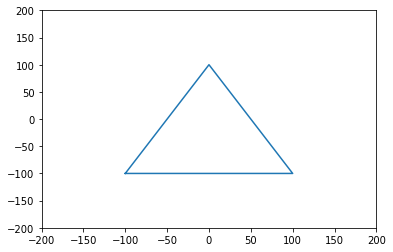

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

A = [
[-100, -100, 1],
[0, 100, 1],
[100, -100, 1],
[-100, -100, 1]
]

A = np.array(A)

x = A[:,0]
y = A[:,1]
plt.plot(x, y)
plt.ylim([-200, 200])
plt.xlim([-200, 200])

In [ ]:
B = np.array([[0.5, 0, 0], [0, 1.2, 0], [0, 0, 1]]) # создаем единичную матрицу, для изменения размера объекта по горизонтали/вертикали изменяем значение a или d соответственно
B

array([[0.5, 0. , 0. ],
       [0. , 1.2, 0. ],
       [0. , 0. , 1. ]])

In [ ]:
res_0 = B@A.transpose()
tt_0 = res_0.transpose()
tt_0

array([[ -50., -120.,    1.],
       [   0.,  120.,    1.],
       [  50., -120.,    1.],
       [ -50., -120.,    1.]])

(-200.0, 200.0)

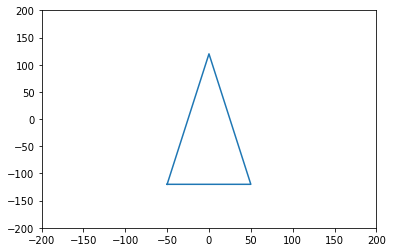

In [ ]:
A0 = np.array(tt_0)

x = A0[:,0]
y = A0[:,1]
plt.plot(x, y)
plt.ylim([-200, 200])
plt.xlim([-200, 200])

In [ ]:
C = np.array([[1, 0, 200], [0, 1, 300], [0, 0, 1]])
C

array([[  1,   0, 200],
       [  0,   1, 300],
       [  0,   0,   1]])

In [ ]:
res_1 = C@A0.transpose()
tt_1 = res_1.transpose()
tt_1

array([[150., 180.,   1.],
       [200., 420.,   1.],
       [250., 180.,   1.],
       [150., 180.,   1.]])

(0.0, 500.0)

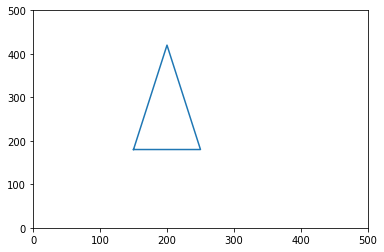

In [ ]:
A1 = np.array(tt_1)

x = A1[:,0]
y = A1[:,1]
plt.plot(x, y)
plt.ylim([0, 500])
plt.xlim([0, 500])


### Задание 3

Найдите собственные значения и собственные вектора матрицы:


In [ ]:
m = np.array([[1, 4],
              [1, 1]])
print(m)



[[1 4]
 [1 1]]


In [ ]:
m_eig = np.linalg.eig(m)

In [ ]:
m_eig[0] #собственные значения

array([ 3., -1.])

In [ ]:
m_eig[1]  #собственные вектора

array([[ 0.89442719, -0.89442719],
       [ 0.4472136 ,  0.4472136 ]])


###Задание 4

Дана функция с неизвестными параметрами a и b, вам также известны значения функции fx в точках x.

Найдите оптимальные параметры a, b, минимизирующие абсолютную ошибку error.


In [ ]:
def f(x, a, b):
    return np.e**a * np.sin(b*x) + x

In [ ]:
x = np.array([0.        , 0.26315789, 0.52631579, 0.78947368, 1.05263158,
              1.31578947, 1.57894737, 1.84210526, 2.10526316, 2.36842105,
              2.63157895, 2.89473684, 3.15789474, 3.42105263, 3.68421053,
              3.94736842, 4.21052632, 4.47368421, 4.73684211, 5.        ])

fx = np.array([  0.        , -12.01819092, -18.90968634, -17.68786571,
                -8.7529108 ,   4.27524517,  16.06801336,  21.81250213,
                19.22059845,   9.48411207,  -3.22273056, -13.48576488,
               -16.91096359, -11.95866834,  -0.58630088,  12.56873816,
                22.12489421,  24.20292139,  18.04522521,   6.33211092])

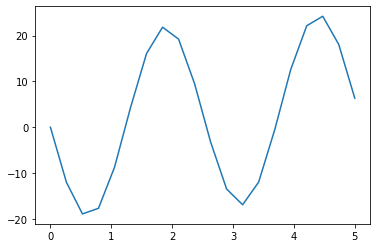

In [ ]:
plt.plot(x, fx)
plt.show()

In [ ]:
def error(params):
    return np.sum(np.abs(fx - f(x, params[0], params[1])))

x0 = [10, 10]
res_m = minimize(error, x0, method='Nelder-Mead', options = {'xtol': 1e-6, 'disp': True})

Optimization terminated successfully.
         Current function value: 0.000102
         Iterations: 67
         Function evaluations: 135


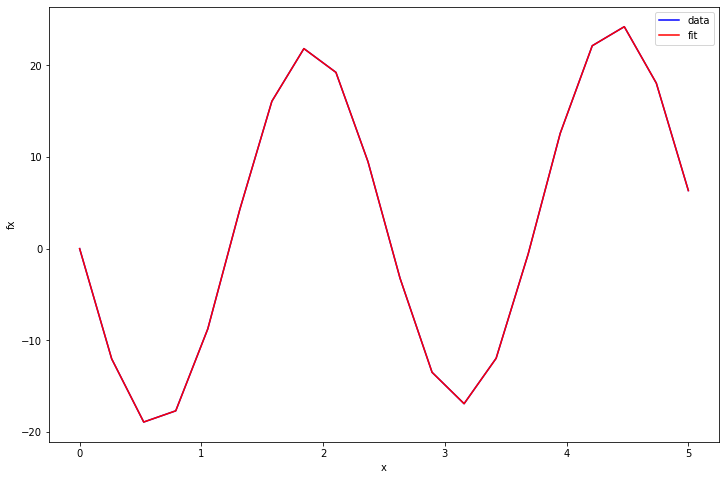

In [ ]:
plt.figure(figsize=(12, 8))
plt.plot(x, fx, color='blue', label = 'data')
plt.plot(x, f(x, res_m.x[0], res_m.x[1]), color='red', label = 'fit')
plt.xlabel('x')
plt.ylabel('fx')
plt.legend()
plt.show()

###Задание 5

Дана матрица рейтингов фильмов (строки - пользователи (10 человек), столбцы - фильмы (15 фильмов))

Необходимо найти наиболее похожего пользователя по косинусной метрике для каждого из пользователей (ответ: 10 пар вида (x, y), где y - наиболее похожий пользователь на пользователя x).

In [ ]:
def cosine( a, b ):
    """
    Подсчет косинуса угла между векторами a, b по их координатам
    """
    # длины векторов
    aLength = np.linalg.norm( a )
    bLength = np.linalg.norm( b )

    return np.dot( a, b ) / ( aLength * bLength )

raitings = np.array([[ 4,  4,  9,  4,  1,  6, 10,  7,  9,  6,  9,  2,  8,  6,  6],
                     [ 9,  2,  5, 10,  7,  8, 10,  5,  6,  2,  1,  6,  8,  9,  7],
                     [ 1,  6,  8,  8,  4,  9,  3,  8, 10,  5,  2,  6,  8,  1,  6],
                     [ 6,  1,  9,  7,  7,  9,  2,  3,  5,  1,  6,  6,  3,  2,  7],
                     [ 3,  7,  3,  5,  7,  9,  9,  6,  2,  9,  1,  2,  8, 10,  6],
                     [ 8,  3,  7,  3,  8,  6,  1,  8,  8,  6,  1,  9,  4, 10,  1],
                     [ 9,  8,  4,  8,  8, 10,  6,  1,  1,  2,  9,  5,  2,  7,  2],
                     [ 4,  1,  6,  4,  3, 10,  4,  4,  2,  8,  7,  9,  3,  8,  3],
                     [ 2,  7,  7,  6, 10,  6,  8,  9,  8,  6, 10,  1,  7, 10,  4],
                     [ 5, 10,  8,  8,  9,  7,  2,  9,  9, 10,  8,  8,  8,  6, 10]])
res = {}
for i, el_i in enumerate(raitings):
    for j, el_j in enumerate(raitings):
        if el_i[i] != el_j[j]:
            degree = np.arccos(cosine(el_i, el_j) ) * 360 / 2 / np.pi #вычисление угла между строками
            res[i, j] = degree

for id in range(0, len(raitings)):
    result = {}
    for k in res:
        if k[0] == id:
            el = res[k]
            result[k] = el

    for k in result:
        if result[k] == min(result.values()):
            print('Самая похожая пара пользователей:', k)





Самая похожая пара пользователей: (0, 8)
Самая похожая пара пользователей: (1, 4)
Самая похожая пара пользователей: (2, 9)
Самая похожая пара пользователей: (3, 9)
Самая похожая пара пользователей: (4, 8)
Самая похожая пара пользователей: (5, 9)
Самая похожая пара пользователей: (6, 3)
Самая похожая пара пользователей: (7, 5)
Самая похожая пара пользователей: (8, 0)
Самая похожая пара пользователей: (9, 2)
